In [2]:
import pandas as pd
from pytrends.request import TrendReq

In [3]:
pytrend = TrendReq()

In [4]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Facebook')
df = pd.DataFrame(keywords)
df.head()

,mid,title,type
0,/m/0hmyfsv,Meta,Technology company
1,/m/0k2ljgx,Messenger,Topic
2,/g/11fqzngkj8,Kingdom of the Wicked,Book by Kerri Maniscalco
3,/m/08p67k,KOLD-TV,Television station
4,/g/11c2y98wy8,Vu,TV program


In [5]:
trendingtoday = pytrend.today_searches()
df = pd.DataFrame(trendingtoday)
df.head()

,exploreLink
0,/trends/explore?q=Niall+Horan&date=now+7-d&geo=US
1,/trends/explore?q=Celtics&date=now+7-d&geo=US
2,/trends/explore?q=Derek+Carr&date=now+7-d&geo=US
3,/trends/explore?q=Bruce+Willis&date=now+7-d&ge...
4,/trends/explore?q=Grizzlies&date=now+7-d&geo=US


In [6]:
# Get Google Top Charts
df = pytrend.top_charts(2022, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,


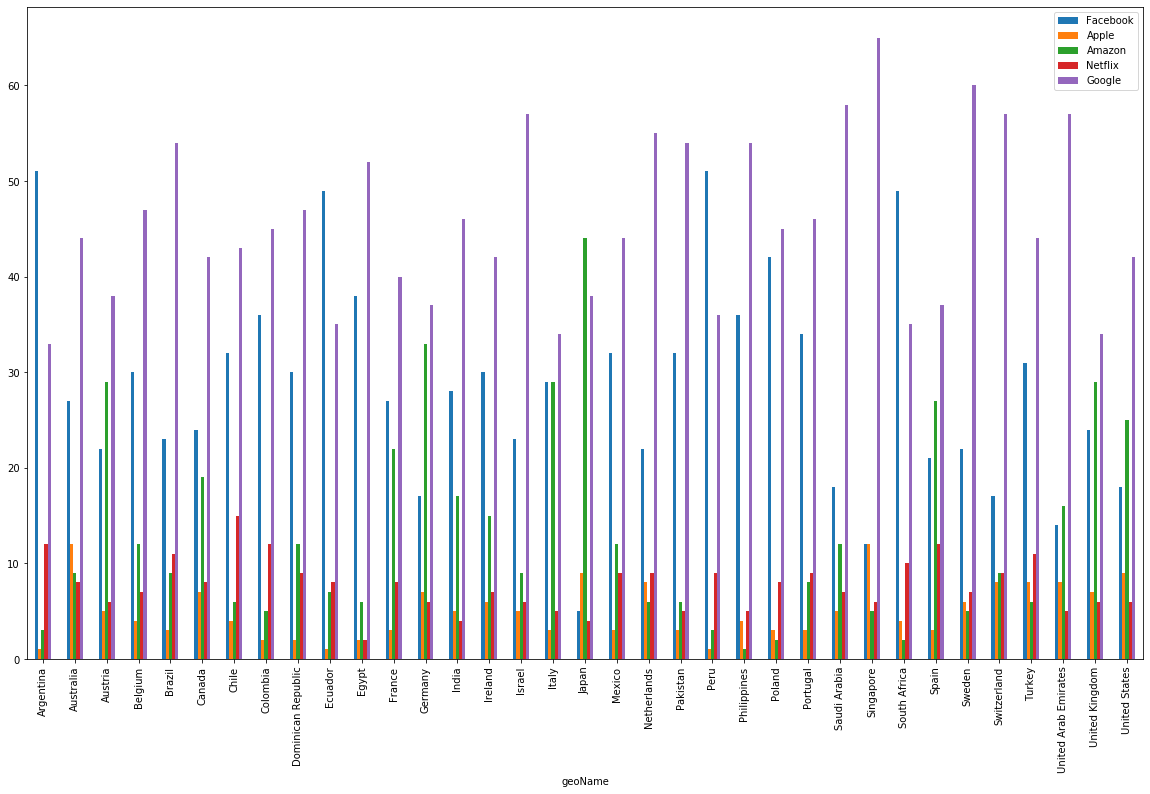

In [7]:
#provide your search terms
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pytrend.interest_by_region()
#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')

In [8]:
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']

#get interest by region for your search terms
pytrend.build_payload(kw_list=kw_list)
df = pytrend.interest_by_region()
df = df.sort_values(kw_list,ascending=False)
df.head(10)

,Facebook,Apple,Amazon,Netflix,Google
geoName,,,,,
Argentina,67,1,1,9,22
Peru,63,1,2,6,28
South Africa,61,3,2,6,28
Ecuador,59,1,5,6,29
Poland,56,1,1,6,36
Portugal,52,2,4,5,37
Turkey,51,5,3,7,34
Colombia,50,1,3,10,36
Mexico,47,2,8,8,35


In [9]:
# Get realtime Google Trends data
df = pytrend.trending_searches(pn='france')
df.head()

,0
0,Benjamin Castaldi
1,Guide Michelin 2023
2,Real Madrid
3,Caen – Sochaux
4,Neymar


In [14]:
#provide your search terms
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
pytrend.build_payload(kw_list=kw_list)


#get related queries
related_queries = pytrend.related_queries()
related_queries.values()

#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names

allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 

#check your dataset
allqueries.head(50)

,top query,top query value,related query,related query value
0,facebook login,100,marketplace facebook,11900
1,facebook iniciar,36,facebook dark mode,1800
2,iniciar sesion facebook,30,facebook market place,1200
3,log in facebook,29,facebook log in to my account,1100
4,facebook entrar,27,facebook lite login,1050
5,facebook lite,15,facebook business manager,950
6,marketplace facebook,11,facebook ads manager,950
7,my facebook,10,facebook lite,800
8,download facebook,9,facebook connexion,650
9,free facebook,9,mbasic facebook,650
